#  <u> 1st step : Load

We import the different librairies that we are going to use :

    - pandas : Pandas is a library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical arrays and time series.
    
    - Seaborn : is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
    
    - Matplotlib : Matplotlib is a Python programming language library for plotting and visualizing data as graphs.
    
    - plotly.express : It provides more than 30 functions for creating different types of figures.
    
    
    - sklearn.cluster : Clustering of unlabeled data can be performed with the module sklearn.cluster. Each clustering algorithm comes in two variants: a class, that implements the fit method to learn the clusters on train data, and a function, that, given train data, returns an array of integer labels corresponding to the different clusters. For the class, the labels over the training data can be found in the labels_ attribute.
    
    - StandardScaler : The sklearn.preprocessing package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.

In [1]:
# we import the useful librairies 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# librairies for kmeans algorithm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

We open the final table with NaN values filled  of the 'filling part ' 

In [2]:
dataset = pd.read_csv ('./data/GoldenDataFrameWithoutCluster.csv')
dataset = dataset.drop(dataset.columns[0], axis = 1)
dataset

,Unnamed,Code,Year,Deaths,Fertility,GDP,GenderInequality,LifeExpectancy,tertiary_education
0,14098,NOR,1831,0.000114,0.217868,5.892337e-07,0.147095,0.483624,0.096871
1,14099,NOR,1832,0.000114,0.217868,5.182407e-07,0.147095,0.483624,0.096871
2,14100,NOR,1833,0.000114,0.217868,5.602877e-07,0.147095,0.483624,0.096871
3,14101,NOR,1834,0.000114,0.217868,6.143394e-07,0.147095,0.483624,0.096871
4,14102,NOR,1835,0.000114,0.217868,6.790523e-07,0.147095,0.483624,0.096871
...,...,...,...,...,...,...,...,...,...
20900,14701,OWID_CIS,2002,NaN,NaN,4.169948e-04,NaN,NaN,NaN
20901,14702,OWID_CIS,2003,NaN,NaN,4.211831e-04,NaN,NaN,NaN
20902,14703,OWID_CIS,2004,NaN,NaN,4.381676e-04,NaN,NaN,NaN
20903,14704,OWID_CIS,2005,NaN,NaN,4.553510e-04,NaN,NaN,NaN


#  <u> 2nd step  :  Correlation matrix of all indicators


### Definition :
A correlation matrix is a table showing the connection coefficients between factors.  
Each table cell indicates the relationship between the two factors

### Values 
The values in the correlation matrix typically range from -1 to 1, where:

A correlation of +1 indicates a perfect positive correlation (when one variable increases, the other also increases in a linear fashion).
A correlation of -1 indicates a perfect negative correlation (when one variable increases, the other decreases in a linear fashion).
A correlation of 0 indicates that there is no linear correlation between the two variables.

### Interpretation

A value close to +1 or -1 indicates a strong correlation between the variables.
A value close to 0 indicates weak or no correlation.
A negative correlation indicates an inverse relationship between the variables, while a positive correlation indicates a direct relationship.

We are going to do the correlation matrix between all the indicators to find how to group our data  
Besides we use colours to show which indicators are correlated 

### The different Method of correlation:

    - pearson : standard correlation coefficient
    - kendall : Kendall Tau correlation coefficient
    - spearman : Spearman rank correlation
    

### <u> 1) Pearson correlation : 
Pearson's correlation evaluates the linear relationship between two continuous variables.  
It measures how much the data deviates from the regression line that connects them.

It is the ratio between the covariance of two variables and the product of their standard deviations.   
It is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1.  


The Pearson correlation is sensitive to outliers (extreme values) and violations of homoscedasticity (unequal variances). 
It is suitable when the relationship between the variables is linear and the data is not strongly non-normally distributed.
Indeed, as the covariance, the measure can only reflect a linear correlation of variables.


In [3]:
# then we drop the columns which are not the indicators columns 
tab_correlation = dataset.drop(dataset.columns[0], axis = 1)
tab_correlation = tab_correlation.drop(tab_correlation.columns[0], axis = 1)
tab_correlation = tab_correlation.drop(tab_correlation.columns[0], axis = 1)

tab_correlation_pearson = tab_correlation.corr(method='pearson', numeric_only= True)
tab_correlation_pearson.style.background_gradient(cmap='coolwarm')


,Deaths,Fertility,GDP,GenderInequality,LifeExpectancy,tertiary_education
Deaths,1.000000,0.058663,0.052478,0.102809,-0.088911,-0.136917
Fertility,0.058663,1.000000,-0.237154,0.749638,-0.664565,-0.560626
GDP,0.052478,-0.237154,1.000000,-0.153416,0.261347,0.413731
GenderInequality,0.102809,0.749638,-0.153416,1.000000,-0.413226,-0.511930
LifeExpectancy,-0.088911,-0.664565,0.261347,-0.413226,1.000000,0.542502
tertiary_education,-0.136917,-0.560626,0.413731,-0.511930,0.542502,1.000000


### <u> 2) Kendall correlation : 

Kendall's correlation is similar to Spearman's correlation, as it also measures the correlation between rankings of data.   However, it assesses the order similarity between data pairs rather than the raw rank correlation as in Spearman.  
Kendall's correlation is also robust to outliers, non-normally distributed, and suitable for data with nonlinear correlation links.


In [4]:
tab_correlation_kendall = tab_correlation.corr(method='kendall',numeric_only= True)
tab_correlation_kendall.style.background_gradient(cmap='coolwarm')

,Deaths,Fertility,GDP,GenderInequality,LifeExpectancy,tertiary_education
Deaths,1.000000,0.333189,0.091636,0.380030,-0.377869,-0.340105
Fertility,0.333189,1.000000,-0.312547,0.539968,-0.534749,-0.497153
GDP,0.091636,-0.312547,1.000000,-0.107401,0.417763,0.300348
GenderInequality,0.380030,0.539968,-0.107401,1.000000,-0.326292,-0.434438
LifeExpectancy,-0.377869,-0.534749,0.417763,-0.326292,1.000000,0.445467
tertiary_education,-0.340105,-0.497153,0.300348,-0.434438,0.445467,1.000000



###  <u> 3) Spearman correlation : 
Spearman's correlation evaluates the monotonic relationship between two variables, whether linear or not.   
It converts data values into ranks (ordinals) and measures the correlation between these ranks.  

Spearman's correlation also ranges from -1 to 1, but it assesses monotonic trends (increasing or decreasing) between variables rather than linearity.

Spearman's correlation is less sensitive to outliers and best suited to ordinal, non-normally distributed data, or when relationships are not strictly linear.


In [5]:
tab_correlation_spearman = tab_correlation.corr(method='spearman',numeric_only= True)
tab_correlation_spearman.style.background_gradient(cmap='coolwarm')

,Deaths,Fertility,GDP,GenderInequality,LifeExpectancy,tertiary_education
Deaths,1.000000,0.484120,0.137822,0.549458,-0.546741,-0.495285
Fertility,0.484120,1.000000,-0.462576,0.748503,-0.724415,-0.692203
GDP,0.137822,-0.462576,1.000000,-0.157201,0.604447,0.440707
GenderInequality,0.549458,0.748503,-0.157201,1.000000,-0.446091,-0.617998
LifeExpectancy,-0.546741,-0.724415,0.604447,-0.446091,1.000000,0.616864
tertiary_education,-0.495285,-0.692203,0.440707,-0.617998,0.616864,1.000000


#  <u> 3rd step : Heatmap for the indicators

A correlation heatmap is a graphical tool that displays the correlation between multiple variables as a color-coded matrix.   
It's like a color chart that shows us how closely related different variables are

[Text(0.5, 0, 'Deaths'),
 Text(1.5, 0, 'Fertility'),
 Text(2.5, 0, 'GDP '),
 Text(3.5, 0, 'GenderInequality'),
 Text(4.5, 0, 'LifeExpectancy'),
 Text(5.5, 0, 'tertiary_education')]

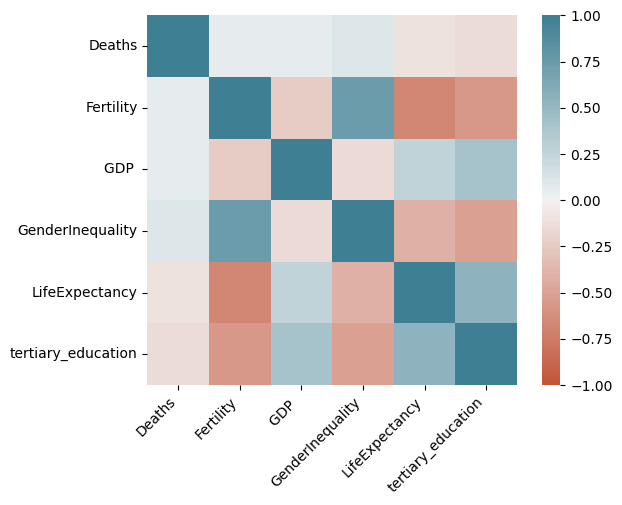

In [6]:
#correlation matrix heatmap for the data set
tab_correlation = tab_correlation_pearson 

ax = sns.heatmap(
    tab_correlation, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

Then we plot the evolution of the value of the ratio between the values of the indicator and the values of the gdp for each year and each indicator 

#  <u> 7th step : Clustering by indicators

## Dendogram

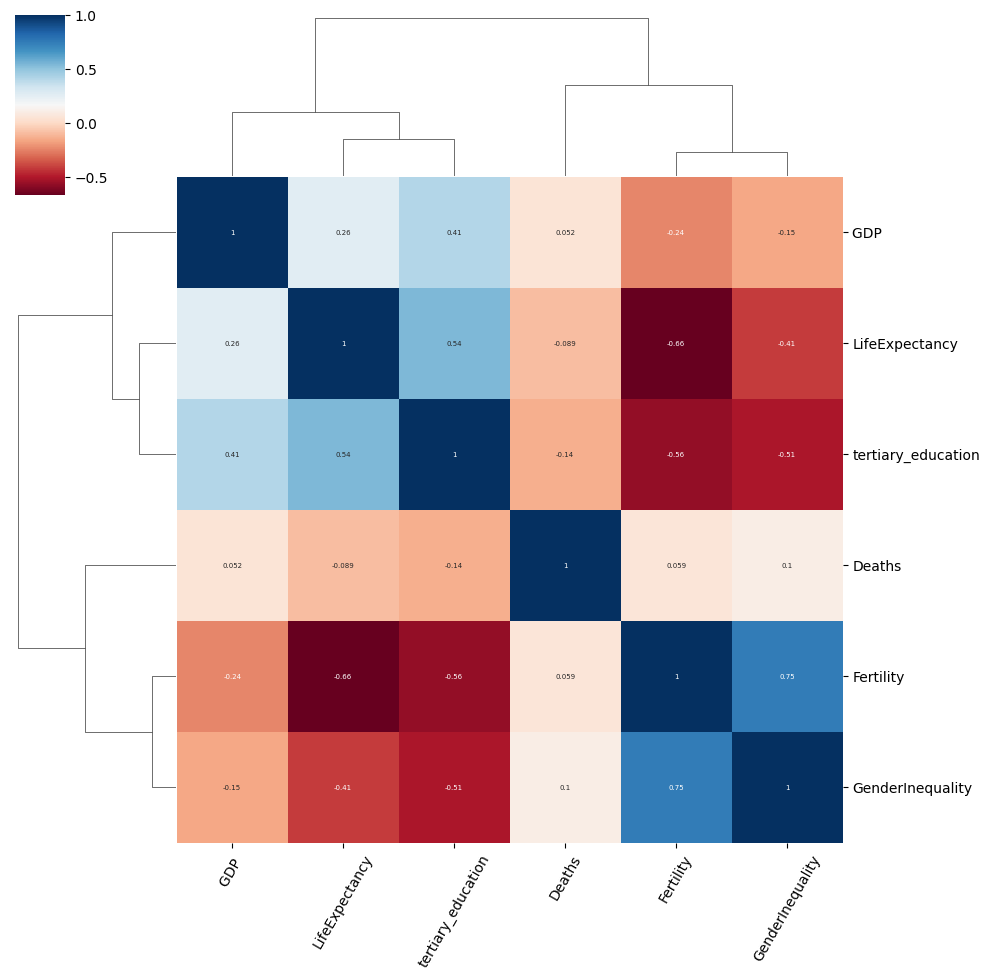

In [7]:
g = sns.clustermap(tab_correlation, 
                   method = 'complete', 
                   cmap   = 'RdBu', 
                   annot  = True, 
                   annot_kws = {'size': 5})

plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);


So we can deduce some cluster among the indicators :


#### If we do 2 cluster we have :
- LifeExpectancy, gdp ,tertiary_education  
- GenderInequality, death ,fertility  

#### If we do 4 cluster we have :
- LifeExpectancy, tertiary_education 
- Gdp
- GenderInequality, fertilty
- Death   


## Scatter plot 

A scatter plot helps detect trends and patterns in data.   
For example, an upward or downward slope can indicate a positive or negative correlation between variables.

The scatterplot can be used to compare the distribution of data between different cluster.

First, we create our 2 clusters that we found with the dendogram

In [8]:
cluster1= ['LifeExpectancy','GDP ','tertiary_education']
cluster2= ['GenderInequality','Deaths','Fertility']

Then, we pivot the table to create an indicator column

In [9]:
dataset = dataset.drop(dataset.columns[0], axis = 1)
dataset=(dataset.set_index(["Code", "Year"]).stack().reset_index(name='Value').rename(columns={'level_2':'Indicator'})) 

For each country and each year we look at the indicator and we affect the numero of the cluster according to te indicator

In [10]:
clusters=[]

#for each line of the indicator column we check the name of the indicator and add the number of cluster in the list
for indicator in dataset['Indicator'] :
    if indicator in cluster1 :
        clusters=clusters + [1]
        
    if indicator in cluster2 :
        clusters=clusters + [2]
        
#then we append the list of cluster to the original DataFrame
dataset['cluster'] = clusters

In [11]:
dataset

,Code,Year,Indicator,Value,cluster
0,NOR,1831,Deaths,1.139216e-04,2
1,NOR,1831,Fertility,2.178685e-01,2
2,NOR,1831,GDP,5.892337e-07,1
3,NOR,1831,GenderInequality,1.470952e-01,2
4,NOR,1831,LifeExpectancy,4.836242e-01,1
...,...,...,...,...,...
106803,OWID_CIS,2002,GDP,4.169948e-04,1
106804,OWID_CIS,2003,GDP,4.211831e-04,1
106805,OWID_CIS,2004,GDP,4.381676e-04,1
106806,OWID_CIS,2005,GDP,4.553510e-04,1


We pivot the column of the countries name

In [12]:
dataset=dataset.set_index(["Indicator", "Year","cluster"]).pivot(columns="Code", values="Value").reset_index()
dataset

Code,Indicator,Year,cluster,ABW,AFG,AGO,AIA,ALB,AND,ARE,...,VGB,VIR,VNM,VUT,WLF,WSM,YEM,ZAF,ZMB,ZWE
0,Deaths,1831,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Deaths,1832,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Deaths,1833,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Deaths,1834,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Deaths,1835,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,tertiary_education,2017,1,NaN,0.121505,NaN,NaN,0.030959,NaN,0.284288,...,NaN,NaN,0.108855,NaN,NaN,NaN,0.049933,0.010652,0.016312,0.01265
1142,tertiary_education,2018,1,NaN,0.121505,NaN,NaN,0.030959,NaN,0.284288,...,NaN,NaN,0.108855,NaN,NaN,NaN,0.049933,0.010652,0.016312,0.01265
1143,tertiary_education,2019,1,NaN,0.121505,NaN,NaN,0.030959,NaN,0.284288,...,NaN,NaN,0.108855,NaN,NaN,NaN,0.049933,0.010652,0.016312,0.01265
1144,tertiary_education,2020,1,NaN,0.121505,NaN,NaN,0.030959,NaN,0.284288,...,NaN,NaN,0.108855,NaN,NaN,NaN,0.049933,0.010652,0.016312,0.01265


Then we plot the scatterplpot, of two countries : Saint-Christophe-et-Nevis and Turques-et-Caïques
We can observe the two clusters in different colors.
We can see a positive correlation between these two countries because of the upward slope 
It is in agreement with the cluster by countries that we have created in the clsuter by countries notebook
Indeed, these two countries are in the same cluster

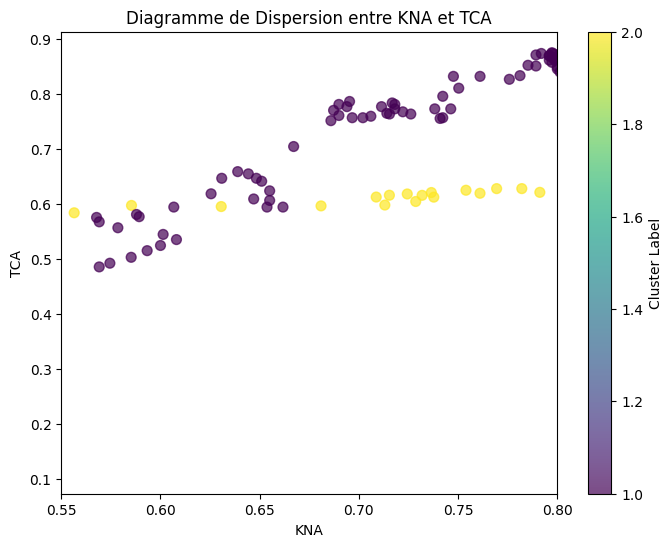

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(dataset['KNA'], dataset['TCA'], c=dataset['cluster'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel('KNA')
plt.ylabel('TCA')
plt.title("Diagramme de Dispersion entre {} et {}".format('KNA', 'TCA'))
plt.colorbar(label='Cluster Label')

plt.gca().set_xlim(0.55,0.8)
plt.show()

Then we plot the scatterplpot, of two other countries :  Guernesey and Angola
We can observe the two clusters in different colors.

We can see a diferent correlation between these two countries 
It is in agreement with the cluster by countries that we have created in the clsuter by countries notebook
Indeed, these two countries are in two distincts clusters

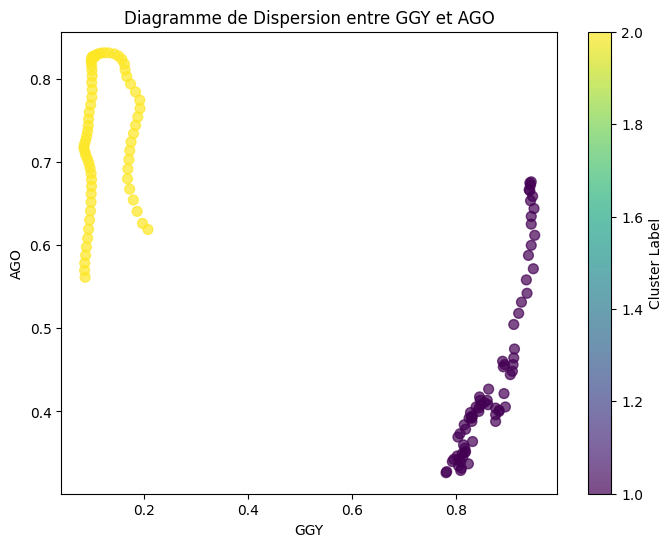

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(dataset['GGY'], dataset['AGO'], c=dataset['cluster'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel('GGY')
plt.ylabel('AGO')
plt.title("Diagramme de Dispersion entre {} et {}".format('GGY', 'AGO'))
plt.colorbar(label='Cluster Label')
plt.show()